# [3. Longest Substring Without Repeating Characters](https://leetcode.com/problems/longest-substring-without-repeating-characters/)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches, animation
from IPython.core.display import HTML

## Brute Force

In [2]:
def lengthOfLongestSubstring(s: str) -> int:
    ans = 0
    for i in range(len(s)):
        for j in range(i+1, len(s)+1):
            temp = {}
            is_repeat = False
            for letter in s[i:j]:
                if letter not in temp:
                    temp[letter] = 1
                else:
                    is_repeat = True
                    break
            if not is_repeat:
                ans = max(ans, len(temp))
    return ans

In [3]:
lengthOfLongestSubstring("abcabcde")

5

In [4]:
s = 'abcabcde'
s = list(s)
length = len(s)
height = 1
ans = 0
history_ans = []
history_string = []
history_repeat = []
history_i = []
history_j = []

for i in range(len(s)):
    for j in range(i+1, len(s)+1):
        temp = {}
        is_repeat = False
        for letter in s[i:j]:
            if letter not in temp:
                temp[letter] = 1
            else:
                is_repeat = True
                break
        if not is_repeat:
            ans = max(ans, len(temp))
        else:
            history_ans.append(ans)
            history_string.append(s[i:j])
            history_repeat.append(is_repeat)
            history_i.append(i)
            history_j.append(j)
            break
        history_ans.append(ans)
        history_string.append(s[i:j])
        history_repeat.append(is_repeat)
        history_i.append(i)
        history_j.append(j)

In [5]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08*len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')

# animation init
def init():
    ax.add_patch(arr_rect)
    ax.add_patch(index_rect)
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    return 

# animation function, iterate through the result
def animate(frame):
    title.set_text('iteration = {}\ncurrent string = "{}", repeat = {}\ncurrent ans={}'.format(frame,
                                                                               ''.join(history_string[frame]), 
                                                                               history_repeat[frame],
                                                                               history_ans[frame]))
    index_rect.set_width(history_j[frame]-history_i[frame])
    index_rect.set_height(1)
    index_rect.set_xy([history_i[frame], 0])
    index_rect.set_color((0.19607843, 0.80392157, 0.19607843, 0.2))
    
    if history_repeat[frame]:
        index_rect.set_color((0.80392157, 0.19607843, 0.19607843, 0.2))

    if frame > 0:
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
    arrow_i = plt.arrow(history_i[frame] + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    arrow_j = plt.arrow(history_j[frame]-1 + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    text_i.set_x(history_i[frame]+0.35)
    text_j.set_x(history_j[frame]-1+0.35)
    text_i.set_text("i={}".format(history_i[frame]))
    text_j.set_text("j={}".format(history_j[frame]-1))
    return 
    
# hide axis
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
plt.axis('off')
animation_html = HTML(anim.to_jshtml())
# prevent plt show the final plot
plt.close()
animation_html

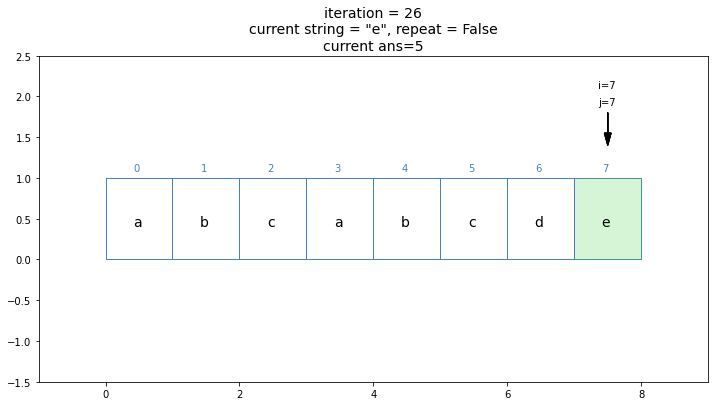

In [6]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08*len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
anim.save('3_longest_substring_without_repeating_characters_brute_force.gif', writer='imagemagick', fps=1)

## Sliding Window

In [7]:
def lengthOfLongestSubstring(s: str) -> int:
    ans = 0
    left = 0
    right = 0
    # [32, 126] are ascii value for all eglish letters, digits, symbols and spaces
    # if not remenbering the ascii range, just use an empty dict and check if character is in the dict
    # but it takes extra time to check existence
    history = dict(zip([chr(i) for i in range(32, 127)], [0 for _ in range(32, 127)]))    
    for i in range(len(s)):
        history[s[i]] += 1
        while history[s[i]] > 1:
            history[s[left]] -= 1
            left += 1
        ans = max(ans, i-left+1)
    return ans

In [8]:
lengthOfLongestSubstring("abcabcde")

5

In [9]:
s = 'abcabcbb'
s = list(s)
length = len(s)
height = 1
ans = 0
history_ans = []
history_dict = []
history_left = []
history_right = []
history_repeat = []
ans = 0
left = 0
# [32, 126] are ascii value for all eglish letters, digits, symbols and spaces
# if not remenbering the ascii range, just use an empty dict and check if character is in the dict
# but it takes extra time to check existence
history = dict(zip([chr(i) for i in range(32, 127)], [0 for _ in range(32, 127)]))    
for i in range(len(s)):
    history[s[i]] += 1
    while history[s[i]] > 1:
        history_ans.append(ans)
        history_dict.append(["{}:{}".format(k, v) for k, v in history.items() if v > 0])
        history_left.append(left)
        history_right.append(i)
        history_repeat.append(True)
        history[s[left]] -= 1
        left += 1
    ans = max(ans, i-left+1)
    history_ans.append(ans)
    history_dict.append(["{}:{}".format(k, v) for k, v in history.items() if v > 0])
    history_left.append(left)
    history_right.append(i)
    history_repeat.append(False)

In [10]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08 * len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')

# animation init
def init():
    ax.add_patch(arr_rect)
    ax.add_patch(index_rect)
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    return 

# animation function, iterate through the result
def animate(frame):
    title.set_text('iteration = {}\ndict = {}\ncurrent ans = {}'.format(frame, history_dict[frame], history_ans[frame]))
    index_rect.set_width(history_right[frame] - history_left[frame] + 1)
    index_rect.set_height(1)
    index_rect.set_xy([history_left[frame], 0])
    index_rect.set_color((0.19607843, 0.80392157, 0.19607843, 0.2))
    if history_repeat[frame]:
        index_rect.set_color((0.80392157, 0.19607843, 0.19607843, 0.2))
    if frame > 0:
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
    arrow_i = plt.arrow(history_left[frame] + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    arrow_j = plt.arrow(history_right[frame] + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    text_i.set_x(history_left[frame]+0.35)
    text_j.set_x(history_right[frame]+0.35)
    text_i.set_text("left={}".format(history_left[frame]))
    text_j.set_text("right={}".format(history_right[frame]))
    return 
    
# hide axis
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
plt.axis('off')
animation_html = HTML(anim.to_jshtml())
# prevent plt show the final plot
plt.close()
animation_html

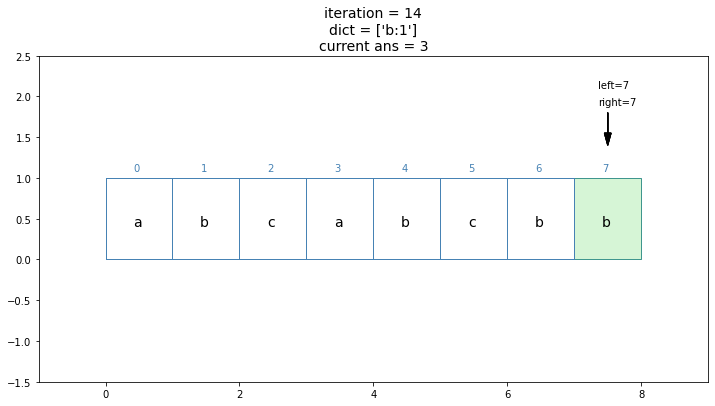

In [11]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08 * len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')

anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
anim.save('3_longest_substring_without_repeating_characters_sliding_window.gif', writer='imagemagick', fps=1)

## Sliding Window Optimized

In [12]:
def lengthOfLongestSubstring(s: str) -> int:
    ans = 0
    left = 0
    history = dict(zip([chr(i) for i in range(32, 127)], [-1 for _ in range(32, 127)]))
    for i, c in enumerate(s):
        if left <= history[c] < i: left = history[c] + 1
        else: ans = max(ans, i-left+1)
        history[c] = i
    return ans

In [13]:
lengthOfLongestSubstring("abcabcde")

5

In [14]:
s = 'abcabcbb'
s = list(s)
length = len(s)
height = 1

history_ans = []
history_dict = []
history_left = []
history_right = []
history_repeat = []

ans = 0
left = 0
history = dict(zip([chr(i) for i in range(32, 127)], [-1 for _ in range(32, 127)]))
for i, c in enumerate(s):
    if left <= history[c] < i:
        history_ans.append(ans)
        history_dict.append(["{}:{}".format(k, v) for k, v in history.items() if v > -1])
        history_left.append(left)
        history_right.append(i)
        history_repeat.append(True)
        left = history[c] + 1
        history_ans.append(ans)
        history_dict.append(["{}:{}".format(k, v) for k, v in history.items() if v > -1])
        history_left.append(left)
        history_right.append(i)
        history_repeat.append(False)
    else:
        ans = max(ans, i-left+1)
        history_ans.append(ans)
        history_dict.append(["{}:{}".format(k, v) for k, v in history.items() if v > -1])
        history_left.append(left)
        history_right.append(i)
        history_repeat.append(False)
    history[c] = i

In [15]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08 * len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')

# animation init
def init():
    ax.add_patch(arr_rect)
    ax.add_patch(index_rect)
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    return 

# animation function, iterate through the result
def animate(frame):
    title.set_text('iteration = {}\ndict = {}\ncurrent ans = {}'.format(frame, history_dict[frame], history_ans[frame]))
    index_rect.set_width(history_right[frame] - history_left[frame] + 1)
    index_rect.set_height(1)
    index_rect.set_xy([history_left[frame], 0])
    index_rect.set_color((0.19607843, 0.80392157, 0.19607843, 0.2))
    if history_repeat[frame]:
        index_rect.set_color((0.80392157, 0.19607843, 0.19607843, 0.2))
    if frame > 0:
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
    arrow_i = plt.arrow(history_left[frame] + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    arrow_j = plt.arrow(history_right[frame] + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    ax.add_patch(arrow_i)
    ax.add_patch(arrow_j)
    text_i.set_x(history_left[frame]+0.35)
    text_j.set_x(history_right[frame]+0.35)
    text_i.set_text("left={}".format(history_left[frame]))
    text_j.set_text("right={}".format(history_right[frame]))
    return 
    
# hide axis
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
plt.axis('off')
animation_html = HTML(anim.to_jshtml())
# prevent plt show the final plot
plt.close()
animation_html

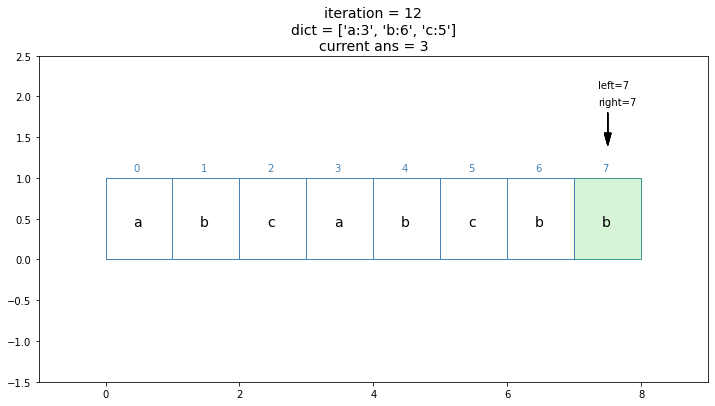

In [16]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
# plot rectangles and letters for `s` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08 * len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, s[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
# point out current index
arrow_i = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
arrow_j = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
text_i = plt.text(0, 2.1, '', fontsize=10, color='k')
text_j = plt.text(0, 1.9, '', fontsize=10, color='k')

anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               frames=len(history_ans),
                               interval=0.9487*1000,
                              )
anim.save('3_longest_substring_without_repeating_characters_sliding_window_opt.gif', writer='imagemagick', fps=1)